#**K-Means clustering 알고리즘**

비지도학습으로 데이터에 레이블이 없는 데이터셋을 다룸. 군집화의 목표는 서로 유사한 데이터들은 같은 그룹으로, 서로 유사하지 않은 데이터는 다른 그룹으로 분리하는 것.

**적용 분야**
* 고객 세분화
* 추천 시스템
* 검색 엔진

**K-Means 알고리즘 원리**
* **Step1.** 초기점(k) 설정: 임의의 초기 중심점(centroid)을 k수 만큼 생성 
* **Step2.** 그룹(cluster) 부여: k개의 중심점과 개별 데이터(Xi)간의 거리를 측정여 그룹 부여
* **Step3.** 중심점 업데이트: 그룹 안의 데이터들이 새로운 중심점을 찾음
* **Step4.** 그룹 안의 데이터들이 변경되고 다시 새로운 줌심점을 찾음 **[변화가 없을때까지 반복]**

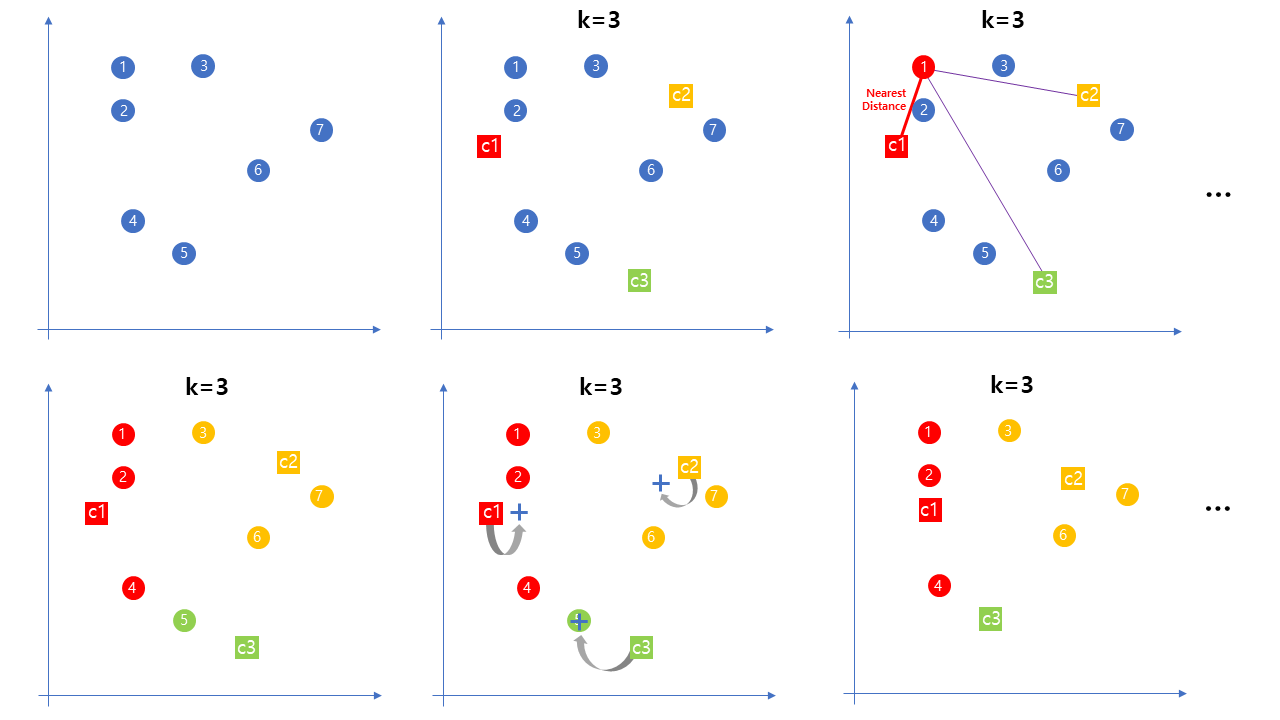

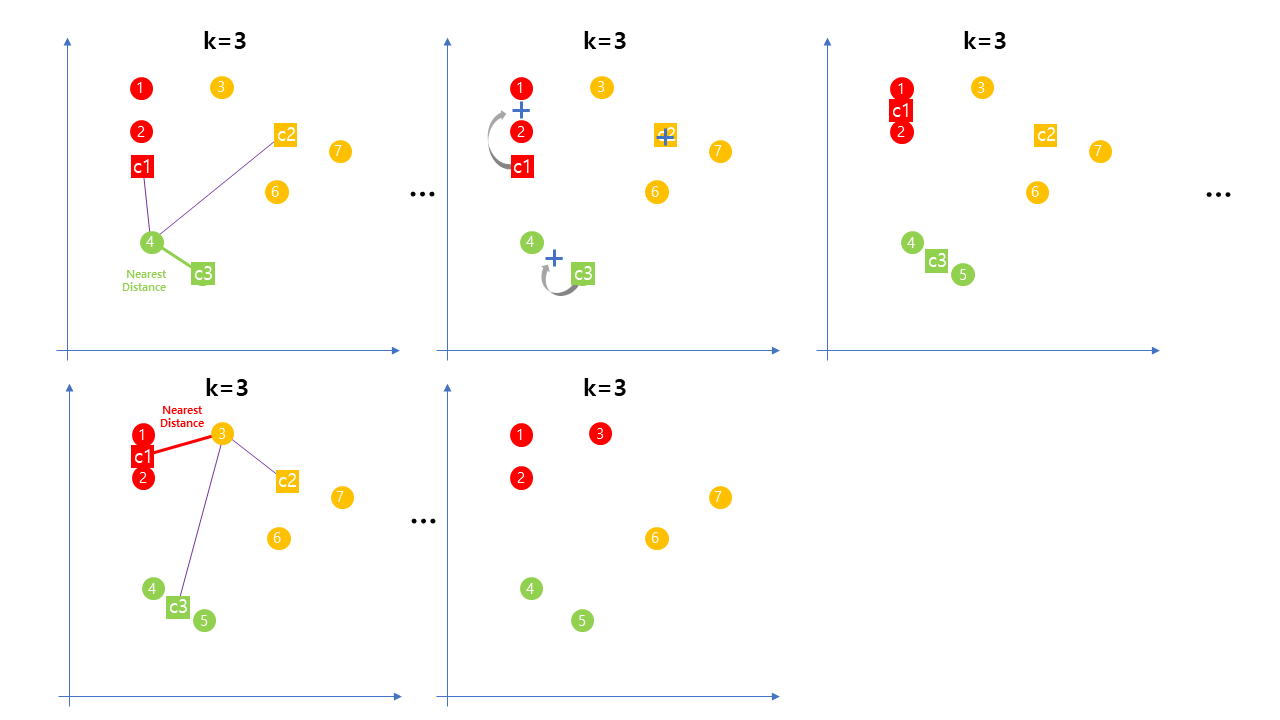

**Optimization Function**

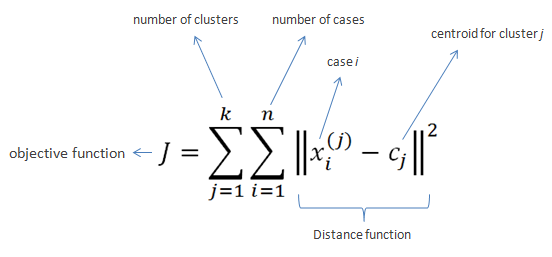

**이슈**: 전통적인 K-Means의 문제, 초기점(초기 중심점) 무작위 선정의 문제 K-Means++

# **군집분석 : 타깃마케팅을 위한 K-means 군집화**

**RFM**은 가치있는 고객을 추출해내어 이를 기준으로 고객을 분류할 수 있는 매우 간단하면서도 유용하게 사용될 수 있는 방법으로 알려져 있어 마케팅에서 가장 많이 사용되고 있는 분석방법 중 하나이다. RFM은 구매 가능성이 높은 고객을 선정하기 위한 데이터 분석방법으로서, 분석과정을 통해 데이터는 의미있는 정보로 전환된다.

**RFM**은 **Recency, Frequency, Monetar**y의 약자로 고객의 가치를 다음의 세 가지 기준에 의해 계산하고 있다.

Recency - 거래의 최근성: 고객이 얼마나 최근에 구입했는가?</br>
Frequency - 거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?</br>
Monetary - 거래규모: 고객이 구입했던 총 금액은 어느 정도인가?</br>

##**데이터 전처리**

**로그 변환**

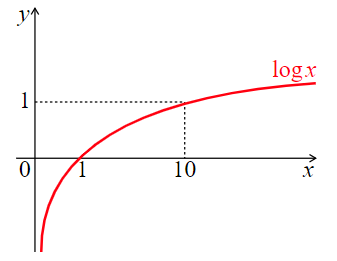

In [ ]:
np.log(0)

-inf

In [ ]:
np.log(-1)

nan

In [ ]:
np.log1p(0)

0.0

In [ ]:
np.log1p(-0.2)

-0.22314355131420976

### **1) 데이터 수집**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings

warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
retail_df = pd.read_excel('/content/drive/MyDrive/DataScience/DataFile/Online_Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


InvoiceNo: 송장번호, 'C'로 시작하는 것은 취소 주문</br>
StockCode:	제품 고유의 제품 품목</br>
Description: 제품 설명</br>
Quantity: 주문 수량</br>
InvoiceDate: 주문날짜와 시간</br>
UnitPrice: 제품 단가(파운드)</br>
CustomerID:고객번호</br>
Country:주문 고객의 국적</br>



In [4]:
temp_df = retail_df.copy()

### **2) 데이터 준비 및 탐색(EDA)**

In [5]:
temp_df.shape

(541909, 8)

In [6]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
temp_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
del temp_df['Description']

In [9]:
temp_df.isna().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
temp_df = temp_df.dropna()

In [11]:
temp_df.isna().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**일일 판매량 분석**
* 날짜만 출력: temp_df['InvoiceDate'].dt.date



In [12]:
temp_df['Date'] = temp_df['InvoiceDate'].dt.date

In [13]:
temp_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09


In [14]:
date_amount = temp_df.groupby('Date')[['InvoiceNo']].count()

In [15]:
date_amount.reset_index(inplace=True)

* 일일 판매량 그래프

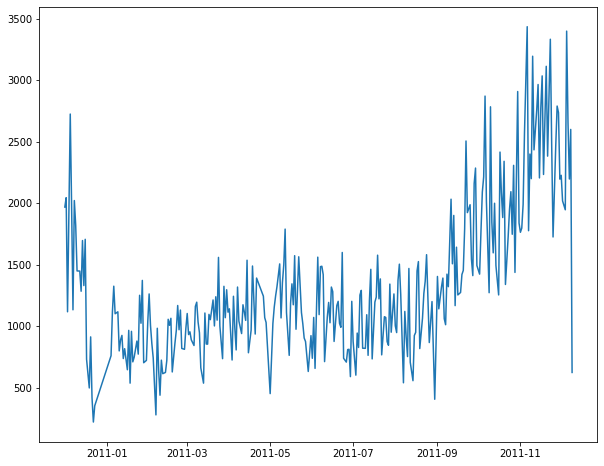

In [16]:
plt.figure(figsize=(10, 8))
x = date_amount['Date']
y= date_amount['InvoiceNo']
plt.plot(x, y)

### **3) Customer 기반 RFM Dataset 생성**

In [17]:
temp_df['SaleAmount'] = temp_df['Quantity'] * temp_df['UnitPrice']

**Monetary data** (total of all the transactions of a customer)</br>
거래규모: 고객이 구입했던 총 금액은 어느 정도인가?</br>

In [18]:
rfm_df = temp_df.groupby('CustomerID')[['SaleAmount']].sum()

**Frequency Data**</br>
거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?</br>

In [19]:
rfm_df['Frequency'] = temp_df.groupby('CustomerID')['InvoiceNo'].count()

In [20]:
rfm_df.rename(columns={'SaleAmount':'Monetary'}, inplace=True)

**Recency**</br>
거래의 최근성: 고객이 얼마나 최근에 구입했는가?</br>

In [21]:
temp_df['Date'].max()

datetime.date(2011, 12, 9)

In [22]:
import datetime

In [23]:
rfm_df['Recency'] = datetime.date(2011, 12, 9) - temp_df.groupby('CustomerID')['Date'].max()

In [24]:
rfm_df['Recency']= rfm_df['Recency'].dt.days

In [25]:
rfm_df

,Monetary,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,2
12348.0,1797.24,31,75
12349.0,1757.55,73,18
12350.0,334.40,17,310
...,...,...,...
18280.0,180.60,10,277
18281.0,80.82,7,180
18282.0,176.60,13,7


In [26]:
# 여기서부터 이어짐
rfm_df['Monetary_log'] = np.log1p(rfm_df['Monetary'])
rfm_df['Frequency_log'] = np.log1p(rfm_df['Frequency'])
rfm_df['Recency_log'] = np.log1p(rfm_df['Recency'])

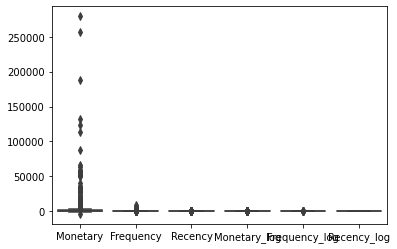

In [30]:
sns.boxplot(data = rfm_df)

In [31]:
rfm_df

,Monetary,Frequency,Recency,Monetary_log,Frequency_log,Recency_log
CustomerID,,,,,,
12346.0,0.00,2,325,0.000000,1.098612,5.786897
12347.0,4310.00,182,2,8.368925,5.209486,1.098612
12348.0,1797.24,31,75,7.494564,3.465736,4.330733
12349.0,1757.55,73,18,7.472245,4.304065,2.944439
12350.0,334.40,17,310,5.815324,2.890372,5.739793
...,...,...,...,...,...,...
18280.0,180.60,10,277,5.201806,2.397895,5.627621
18281.0,80.82,7,180,4.404522,2.079442,5.198497
18282.0,176.60,13,7,5.179534,2.639057,2.079442


In [32]:
rfm_df[rfm_df['Monetary'] < 0]

,Monetary,Frequency,Recency,Monetary_log,Frequency_log,Recency_log
CustomerID,,,,,,
12503.0,-1126.00,1,337,NaN,0.693147,5.823046
12505.0,-4.50,1,301,NaN,0.693147,5.710427
12605.0,-7.50,3,365,NaN,1.386294,5.902633
12666.0,-227.44,2,359,NaN,1.098612,5.886104
12870.0,-14.90,2,366,NaN,1.098612,5.905362
12943.0,-3.75,1,301,NaN,0.693147,5.710427
13154.0,-611.86,1,144,NaN,0.693147,4.976734
13672.0,-71.46,16,301,NaN,2.833213,5.710427
13693.0,-32.00,4,325,NaN,1.609438,5.786897


In [33]:
rfm_df.drop([18072.0], axis=0, inplace=True)

KeyError: ignored

In [34]:
rfm_df[rfm_df['Monetary'] < 0]

,Monetary,Frequency,Recency,Monetary_log,Frequency_log,Recency_log
CustomerID,,,,,,
12503.0,-1126.00,1,337,NaN,0.693147,5.823046
12505.0,-4.50,1,301,NaN,0.693147,5.710427
12605.0,-7.50,3,365,NaN,1.386294,5.902633
12666.0,-227.44,2,359,NaN,1.098612,5.886104
12870.0,-14.90,2,366,NaN,1.098612,5.905362
12943.0,-3.75,1,301,NaN,0.693147,5.710427
13154.0,-611.86,1,144,NaN,0.693147,4.976734
13672.0,-71.46,16,301,NaN,2.833213,5.710427
13693.0,-32.00,4,325,NaN,1.609438,5.786897


In [35]:
rfm_df.isna().sum()

Monetary          0
Frequency         0
Recency           0
Monetary_log     41
Frequency_log     0
Recency_log       0
dtype: int64

In [36]:
rfm_df = rfm_df.fillna(0)

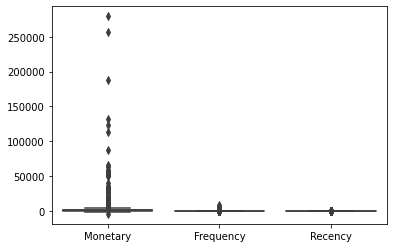

In [37]:
sns.boxplot(data = rfm_df[['Monetary',	'Frequency',	'Recency']])

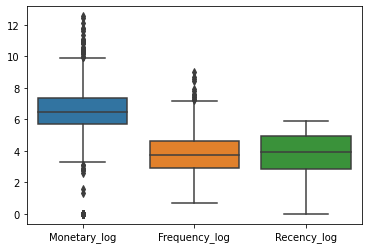

In [38]:
sns.boxplot(data = rfm_df[['Monetary_log',	'Frequency_log',	'Recency_log']])

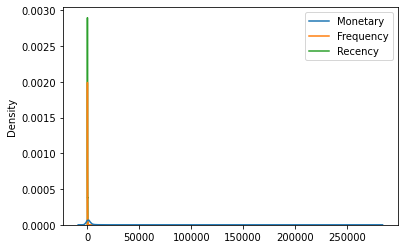

In [39]:
sns.kdeplot(data= rfm_df[['Monetary',	'Frequency',	'Recency']])

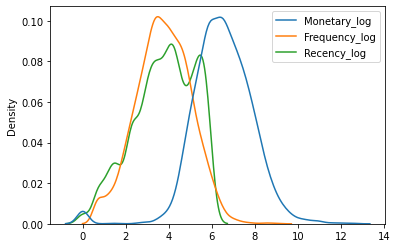

In [40]:
sns.kdeplot(data= rfm_df[['Monetary_log',	'Frequency_log',	'Recency_log']])

###**표준화**

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaled_data = StandardScaler().fit_transform(rfm_df)
scaled_data

array([[-0.23102882, -0.39173375,  2.31655188, -4.52852343, -2.09382818,
         1.42912437],
       [ 0.29334705,  0.38255969, -0.88884437,  1.30969237,  1.16166433,
        -1.88922643],
       [-0.01236773, -0.26698647, -0.16440497,  0.69973219, -0.2192503 ,
         0.39845686],
       ...,
       [-0.20954279, -0.34441581, -0.83922523, -0.91524746, -0.87391547,
        -1.19499913],
       [ 0.02384462,  2.85169543, -0.87892054,  0.80658115,  2.28609662,
        -1.68560613],
       [-0.00749627, -0.09922289, -0.49189127,  0.71509484,  0.41186737,
        -0.00465664]])

In [43]:
scaled_df = pd.DataFrame(scaled_data)

In [44]:
scaled_df

,0,1,2,3,4,5
0,-0.231029,-0.391734,2.316552,-4.528523,-2.093828,1.429124
1,0.293347,0.382560,-0.888844,1.309692,1.161664,-1.889226
2,-0.012368,-0.266986,-0.164405,0.699732,-0.219250,0.398457
3,-0.017197,-0.086318,-0.730063,0.684162,0.444641,-0.582757
4,-0.190344,-0.327209,2.167694,-0.471716,-0.674894,1.395784
...,...,...,...,...,...,...
4366,-0.209056,-0.357321,1.840208,-0.899710,-1.064897,1.316389
4367,-0.221196,-0.370226,0.877597,-1.455901,-1.317088,1.012657
4368,-0.209543,-0.344416,-0.839225,-0.915247,-0.873915,-1.194999
4369,0.023845,2.851695,-0.878921,0.806581,2.286097,-1.685606


In [45]:
scaled_df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [46]:
scaled_data[:, 3:]

array([[-4.52852343, -2.09382818,  1.42912437],
       [ 1.30969237,  1.16166433, -1.88922643],
       [ 0.69973219, -0.2192503 ,  0.39845686],
       ...,
       [-0.91524746, -0.87391547, -1.19499913],
       [ 0.80658115,  2.28609662, -1.68560613],
       [ 0.71509484,  0.41186737, -0.00465664]])

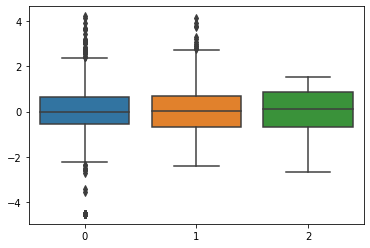

In [47]:
sns.boxplot(data = scaled_data[:, 3:])

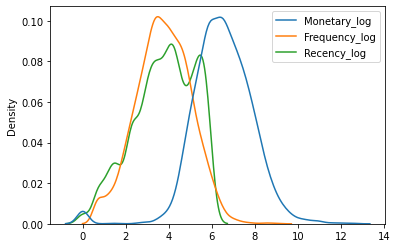

In [48]:
sns.kdeplot(data= rfm_df[['Monetary_log',	'Frequency_log',	'Recency_log']])

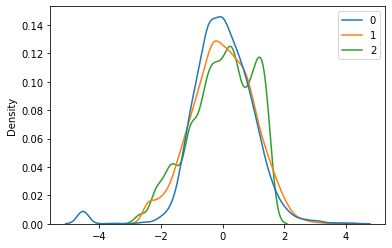

In [49]:
sns.kdeplot(data= scaled_data[:, 3:])

## **Clustering: K-Means**

In [54]:
from sklearn.cluster import KMeans

In [55]:
scaled_data[:, 3:]

array([[-4.52852343, -2.09382818,  1.42912437],
       [ 1.30969237,  1.16166433, -1.88922643],
       [ 0.69973219, -0.2192503 ,  0.39845686],
       ...,
       [-0.91524746, -0.87391547, -1.19499913],
       [ 0.80658115,  2.28609662, -1.68560613],
       [ 0.71509484,  0.41186737, -0.00465664]])

In [56]:
kmeans =  KMeans(n_clusters = 5, init='k-means++', random_state = 1000)
kmeans.fit(scaled_data[:, 3:])

KMeans(n_clusters=5, random_state=1000)

In [57]:
rfm_df['segment'] = kmeans.predict(scaled_data[:, 3:])

In [58]:
rfm_df

,Monetary,Frequency,Recency,Monetary_log,Frequency_log,Recency_log,segment
CustomerID,,,,,,,
12346.0,0.00,2,325,0.000000,1.098612,5.786897,4
12347.0,4310.00,182,2,8.368925,5.209486,1.098612,3
12348.0,1797.24,31,75,7.494564,3.465736,4.330733,0
12349.0,1757.55,73,18,7.472245,4.304065,2.944439,0
12350.0,334.40,17,310,5.815324,2.890372,5.739793,2
...,...,...,...,...,...,...,...
18280.0,180.60,10,277,5.201806,2.397895,5.627621,2
18281.0,80.82,7,180,4.404522,2.079442,5.198497,2
18282.0,176.60,13,7,5.179534,2.639057,2.079442,1


In [59]:
rfm_df['segment'].value_counts()

2    1356
0    1253
3     877
1     822
4      63
Name: segment, dtype: int64

In [60]:
rfm_df.groupby('segment')[['Monetary',	'Frequency',	'Recency']].mean()

,Monetary,Frequency,Recency
segment,,,
0,1351.608302,82.336792,91.453312
1,614.814964,37.338200,17.218978
2,296.373592,15.385693,183.084808
3,6513.507708,286.762828,11.196123
4,-208.033968,9.190476,212.873016


Text(0, 0.5, 'Recency')

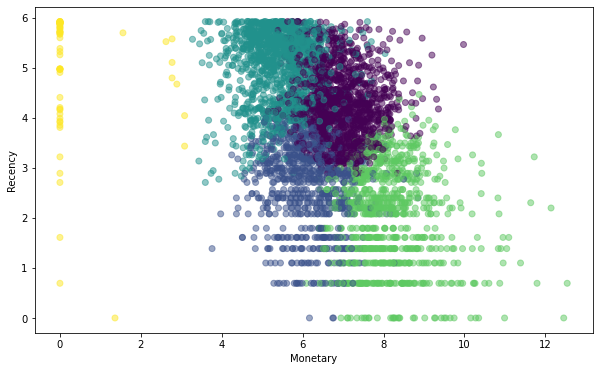

In [61]:
x = rfm_df['Monetary_log']
y = rfm_df['Recency_log']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c = rfm_df['segment'], alpha = 0.5)
plt.xlabel('Monetary')
plt.ylabel('Recency')

## **Clustering 최적화(1)**

**엘보우(Elbow) 기법**</br>
k-평균 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있는데, 이 거리의 제곱 합을 **이너셔(intertia)**라고 부른다.</br>
엘보우 방법은 클러스터 개수를 늘려가면서 이너셔(intertia)의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법이다. 클러스터 개수를 증가 시켜서 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 있다.

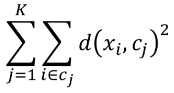

In [62]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 1234)
    kmeans.fit(scaled_data[:, 3:])
    distortions.append(kmeans.inertia_)

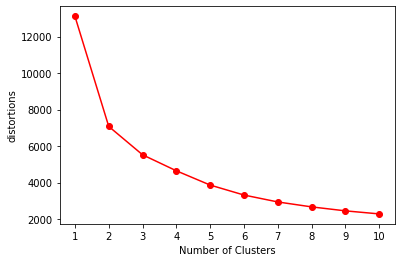

In [63]:
plt.plot(range(1, 11), distortions, 'ro-')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("distortions")
plt.show()

In [64]:
kmeans =  KMeans(n_clusters = 5, init='k-means++', random_state = 1000)
kmeans.fit(scaled_data[:, 3:])

KMeans(n_clusters=5, random_state=1000)

In [65]:
segment = kmeans.fit_predict(scaled_data[:,3:])

In [66]:
rfm_df['Clustering'] = segment

In [67]:
rfm_df['Clustering'].value_counts()

2    1356
0    1253
3     877
1     822
4      63
Name: Clustering, dtype: int64

In [68]:
rfm_df.groupby('Clustering')[['Monetary',	'Frequency',	'Recency']].median()

,Monetary,Frequency,Recency
Clustering,,,
0,1019.760,68.0,67.0
1,483.455,32.0,16.0
2,243.460,13.0,183.0
3,3047.630,197.0,8.0
4,-14.900,2.0,249.0


## **Clustering 최적화(2)**

**실루엣 계수(Silhouette Coefficient):**</br>

 

각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 값을 구하며,

군집 안에 있는 데이터들은 잘 모여있는지, 군집끼리는 서로 잘 구분되는지 클러스터링을 평가하는 척도로 활용된다.

* 실루엣 계수는 -1 에서 1사이의 값을 가지며, 1로 가까워 질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고, 0에 가까울 수록 근처의 군집과 가까워 진다는 것이다</br>  

* 각 클러스터 내의 데이터 포인트들의 실루엣 계수 평균값을 구하여, 각 클러스터별 평균값도 구할 수 있다. 1에 가까운 평균값을 가지는 클러스터는 'clear-cut' 클러스터, 0에 가까운 값을 가지는 클러스터는 'weak' 클러스터로 표현된다.

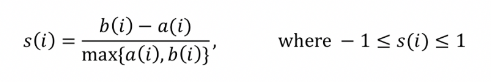

In [69]:
from sklearn.metrics import silhouette_score

In [70]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 1234)
    kmeans.fit(scaled_data[:, 3:])
    score = silhouette_score(scaled_data[:, 3:], kmeans.labels_)
    silhouette_coefficients.append(score)

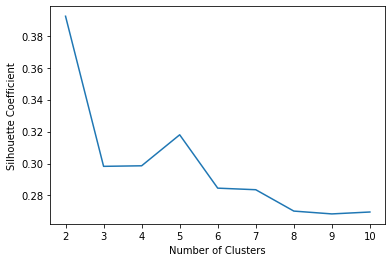

In [71]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [77]:
stdlist = []
import random
def dong():
  for i in range(0,28):
    objlist = []
    for j in range(0, 3):
        objlist.append(random.randint(30,100))
    stdlist.append(objlist)

dong()




AttributeError: ignored